# Data Science Project "Navigating Missed Hospital Visits"

git add .
git commit -m „what you edited“
git push

# 1. General Information
Used dataset: Dataset_Hospital_Visits.csv

Group 7:
Yaren Sever, Kira Duske, Jinlin Chen

# 2.Business Understanding

Missed appointments, or 'No-shows', lead to considerable inefficiencies, including wasted resources and financial losses. They also negatively impact patient health outcomes due to delays in cases requiring earlier intervention. The aim of this project is to tackle the issue of missed hospital appointments by developing a machine learning model that predicts which patients are likely to miss their appointments. This enables hospitals to implement targeted inventories/strategies, optimizing resource use, reducing idle time and costs, enhancing schedule flexibility, and most importantly, improving patient care.

Upon examining the dataset, the following assumptions are made:

1. Impact of waiting time: Longer waiting times between scheduling and the appointment might increase the chances of a no-show. 

2. Patient Age and No-Show Correlation: Different age groups might exhibit varied tendencies in missing appointments. Typically, older patients, often dealing with more urgent health issues, may be less likely to miss appointments compared to younger patients. Conversely, younger patients, often having more unpredictable schedules, could demonstrate a higher propensity for no-shows.

3. Health Conditions Influence: Certain health conditions like handicaps or chronic illnesses like diabetes might also affect a patient's ability to keep appointments.

4. Effectiveness of SMS Reminders: The reception of SMS reminders might significantly reduce the probability of missing appointments.

In this project, the correlation between these features, as well as other features in the data set and appointment no-shows will be shown, determining which features are most predictive and therefore should be included in the machine learning model.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Read csv file and import data.
df=pd.read_csv("/Users/jinlinchen/Documents/Study/HWR Berlin/Data Science/Data Science Project/Dataset_Hospital_Visits.csv")

# 3.Exploratory Data Analysis

In order to gain detailed information about our dataset, we looked at the description, missing data and possible relationships between columns such as age, gender, no-shows and so on.

The first step is to get an overview of all the columns and data types in the dataset. We identified 14 columns such as PatientID, AppointmentID, Gender and Age.

The dataset contains, for example, integers, floats, objects and strings.

We also checked for duplicates within the dataset and for null values.

In [3]:
# To gain information of the dataframe such as included colums, number of non-null for each columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [4]:
# Provide statistics of the dataframe
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [5]:
# Check for duplicated values. 
# In this data frame there is 0 duplicated value.
print(df.duplicated().sum())

0


In [6]:
# Showing how many null values each column contains
print("Initial length:", len(df), "rows")
print(df.isnull().sum())

Initial length: 88421 rows
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8807
Community          10713
SocialWelfare      12519
Hipertension        8021
Diabetes               0
Alcoholism         14889
Handcap                0
SMS_received           0
No-show                0
dtype: int64


In [7]:
# Change data type of a column 
# Patient Id is changed from float to integer as integer is a more appropriate data type for patient id. 
# Scheduled date and Appointment Date are changed from object to data type of date time, as object is the wrong data type and date time is easier for calculation in the following steps.
#df['PatientId']=df['PatientId'].astype(int)
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])

# Check current data type of each column and show first 5 rows of the dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   PatientId        88421 non-null  float64            
 1   AppointmentID    88421 non-null  int64              
 2   Sex              88421 non-null  object             
 3   ScheduledDate    88421 non-null  datetime64[ns, UTC]
 4   AppointmentDate  88421 non-null  datetime64[ns, UTC]
 5   Age              79614 non-null  float64            
 6   Community        77708 non-null  object             
 7   SocialWelfare    75902 non-null  object             
 8   Hipertension     80400 non-null  object             
 9   Diabetes         88421 non-null  object             
 10  Alcoholism       73532 non-null  object             
 11  Handcap          88421 non-null  object             
 12  SMS_received     88421 non-null  object             
 13  No-show         

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,no,no,no,No
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,no,no,no,No
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,no,no,no,No
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,No
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,no,no,no,No


## 3.1. Target Variable Distribution
At first we analyze the distribution of no-show to determine if stratification is necessary.

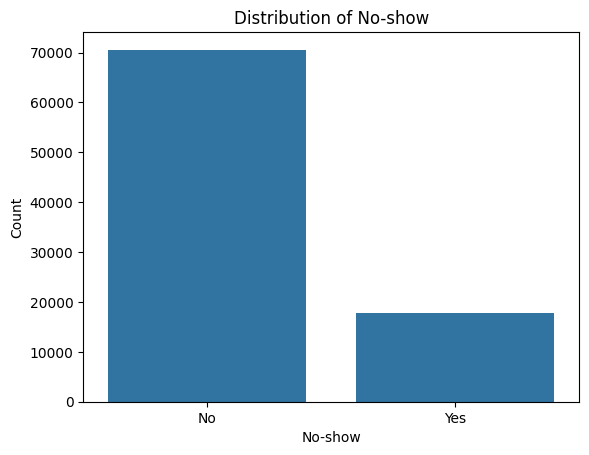

In [8]:
sns.countplot(data=df, x="No-show")
plt.title("Distribution of No-show")
plt.xlabel("No-show")
plt.ylabel("Count")
plt.show()

## 3.2. Waiting Time Analysis

<Axes: title={'center': 'Relation between Waiting Time and No Show (Counts)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

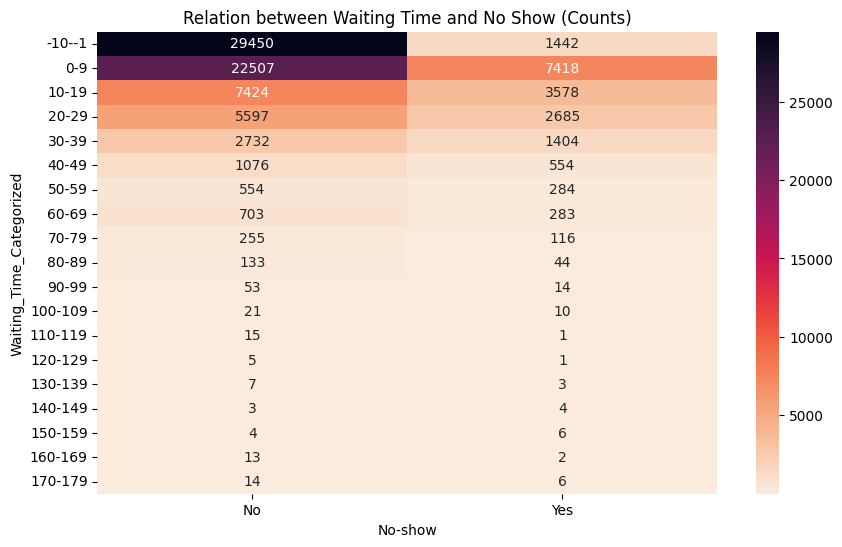

In [9]:
# Showing relation between waiting time (appointment date - scheduled date) and no show with a heatmap. 
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
df['WaitingTime'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days

# Categorize waiting time into bins of 10 days
max_waiting_time = df['WaitingTime'].max()
min_waiting_time = df['WaitingTime'].min()
waiting_time_bins = np.arange(-10, max_waiting_time+10,10)
waiting_time_labels = [f"{i}-{i+9}" for i in waiting_time_bins[:-1]]
df['Waiting_Time_Categorized'] = pd.cut(df['WaitingTime'], bins=waiting_time_bins, labels=waiting_time_labels, right=False)

wt_hm_counts = df.pivot_table(index='Waiting_Time_Categorized', columns='No-show', aggfunc='size',fill_value=0)

plt.figure(figsize=(10,6))
plt.title('Relation between Waiting Time and No Show (Counts)')
sns.heatmap(wt_hm_counts, annot=True, cmap = sns.cm.rocket_r, fmt='g')

The heatmap shows that the no-show rates is in relation with waiting time. As the different colours visualize the count. As shown in the heatmap, the no-show amount increases drastically once reaching the waiting_Time_category of 70-79. Furthermore we see that there are negative values for waiting time included in the heatmap, which is the case for nearly 30.000 cases in the dataframe.

<Axes: title={'center': 'Relation between Waiting Time and No Show (Percentage)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

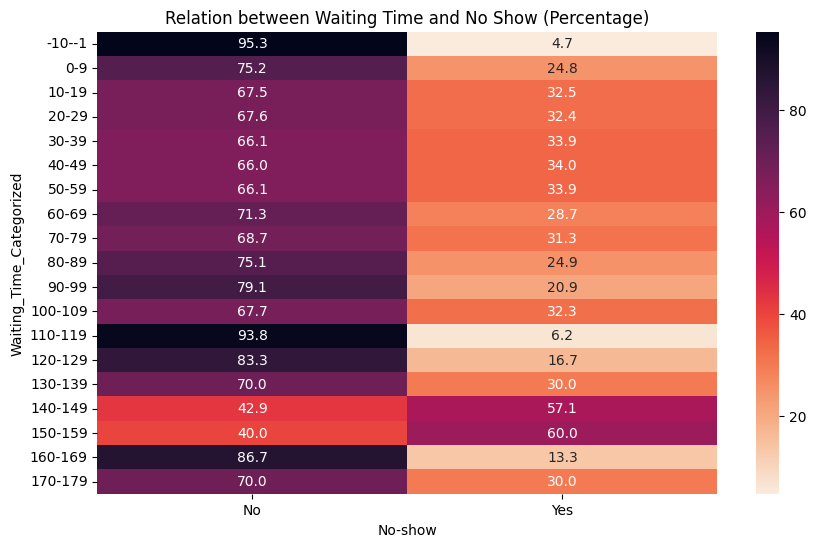

In [10]:
# Convert counts to percentages
wt_hm_percentage = wt_hm_counts.div(wt_hm_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
plt.title('Relation between Waiting Time and No Show (Percentage)')
sns.heatmap(wt_hm_percentage, annot=True, cmap=sns.cm.rocket_r, fmt='.1f')

#This histogram illustrates the differences in patient no-show rates based on whether they received an SMS reminder for their appointment

The transition to percentage allows a better understanding of the relations within the heatmap. It shows that the no-show rate is highest for the waiting_time_category between 140 and 159 as 57-60 percent do not attend their appointment.

## 3.3. Categorical Variable Analysis

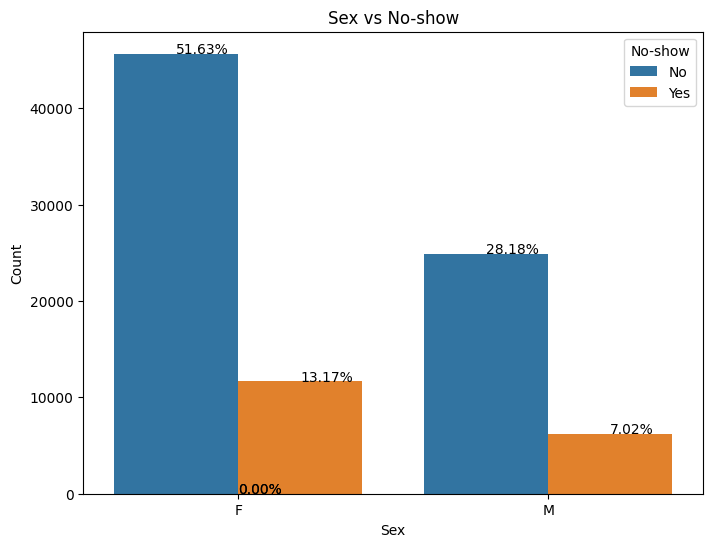

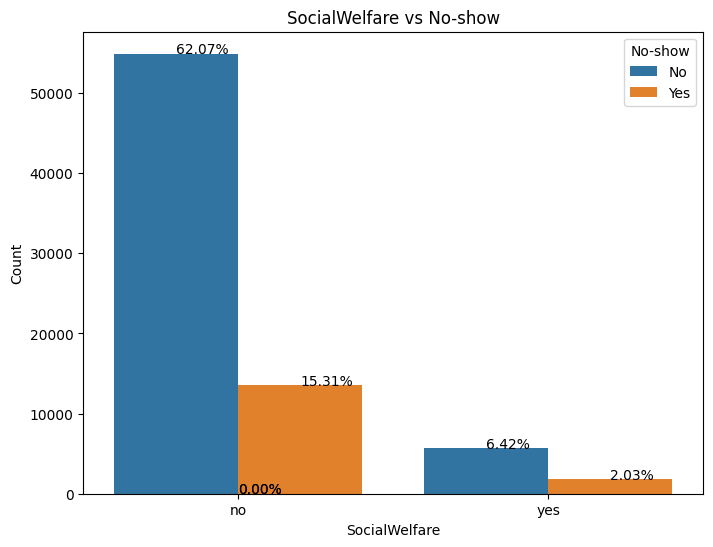

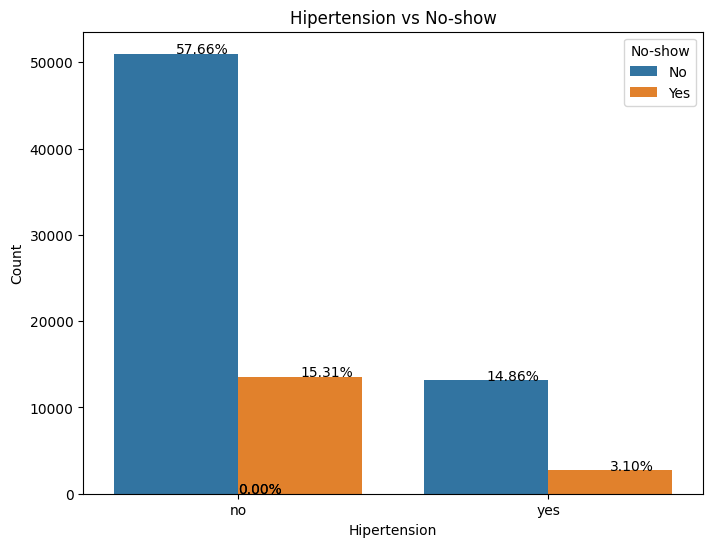

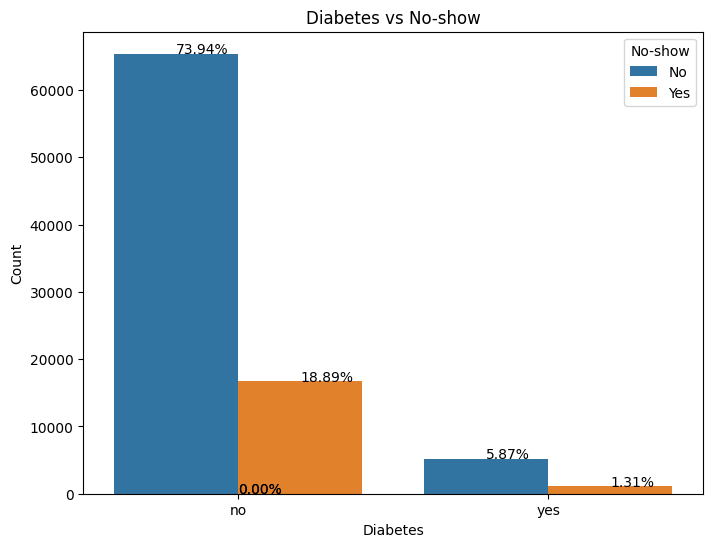

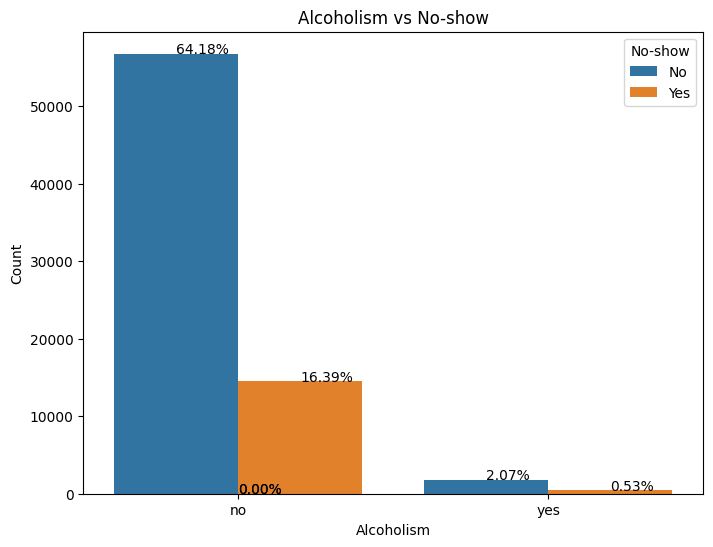

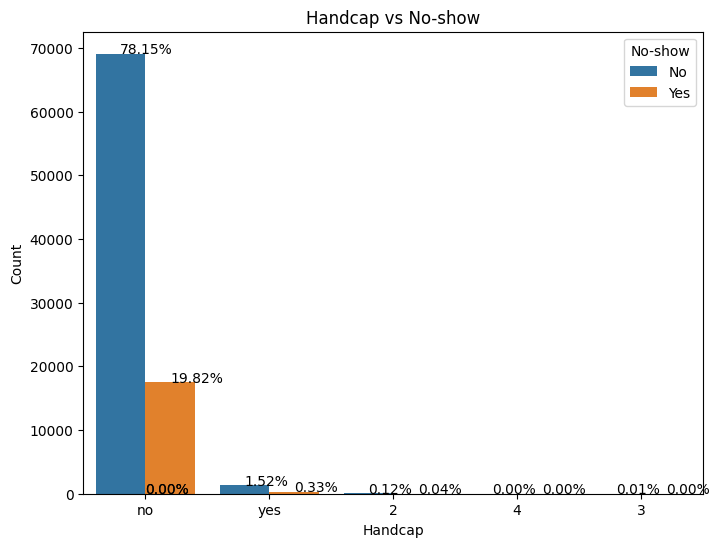

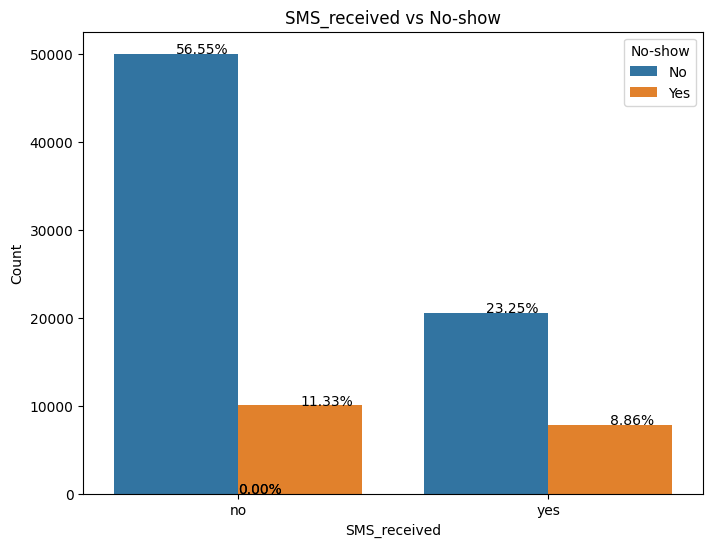

In [11]:
categorical_features = ['Sex', 'SocialWelfare', 'Hipertension',	'Diabetes',	'Alcoholism', 'Handcap','SMS_received']

for i in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=i, hue='No-show', data=df)

    total = float(len(df[i]))

    # Adding percentage labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                f'{(height / total) * 100:.2f}%'
        )

    plt.title(f'{i} vs No-show')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend(title='No-show', loc='upper right')
    plt.show()

1) The first bar chart shows the distribution of genders within the categories no-show: yes and no-show:no. While more than 50% of the female patients show up for their appointment, and 13% seem not to, only 28 percent of the male patients show up and 7 seem not to.
2) When analyzing the relation between no-shows and social welfare, we can see that those who are not relying on social welfare have a no-show rate of 15,31% while more than 65 % of the patients without social welfare show up for their appointments. In contrast only about 6 % of those patients relying on social welfare show up for appointments and around 2 % have a positive no-show.
3) Furthermore we wanted to analyze the relation between different health conditions and their impact on the no-show rate of patients and as shown in the graphs the following observations can be made:
Hipertension: more than 57% of those patients without a hipertension show up , while 15,31% do not. In contrast to that, only 14,86% of those patients having a hipertension have a negative no-show rate, while 3,10% have a positive no-show rate.
Diabetes: The difference is even higher for diabetes, as nearly 80% of those patients not having diabetes show up for their appointments, while less than 19 % do not. Those patients being affected by diabetes claim to not show up for their apointments in 1,31% percent and seem to show up in 5,87% percent.
Alcoholism: ADD
4) SMS received: ADD

To gain some general information about our dataframe we created plots showing us the distribution of age, no-shows, communities and their amount of originated patients and gender distribution across the patients.

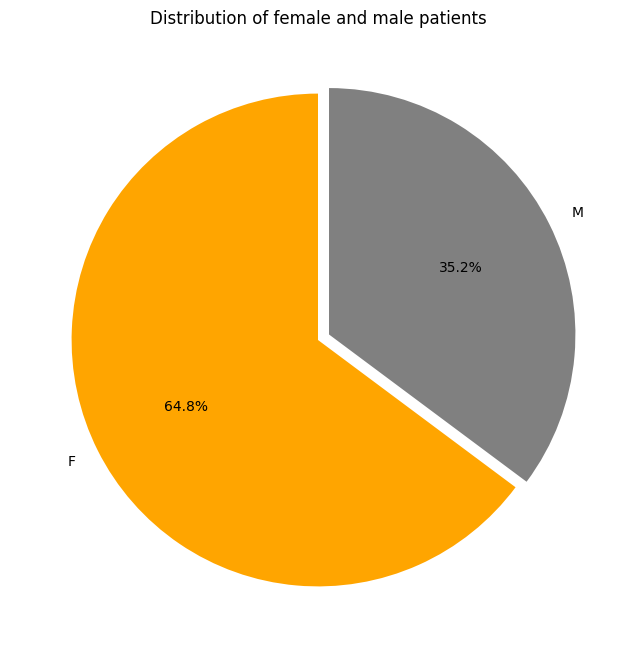

In [12]:
#Pie chart portraying the distribution of female and male patients

# Counting the occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['orange', 'grey'], startangle=90, explode=(0, 0.05))
plt.title('Distribution of female and male patients')
plt.show()

The pie chart shows that there are 64,8 %  female patients (orange) in the data frame, while there are 35,2 % male (blue) patients. 

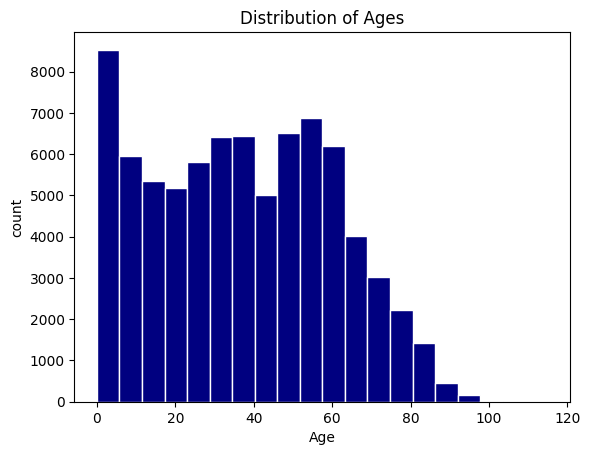

In [13]:
#Histrogram showing the distribution of the patients age

# Histogram for 'Age'
plt.hist(df['Age'], bins=20, edgecolor='white', color= 'navy')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

The age distribution bar chart shows what age groups are represented in the dataframe. As seen in the bar chart, the data contains patients from less than 20 years old to more than 100 years old.

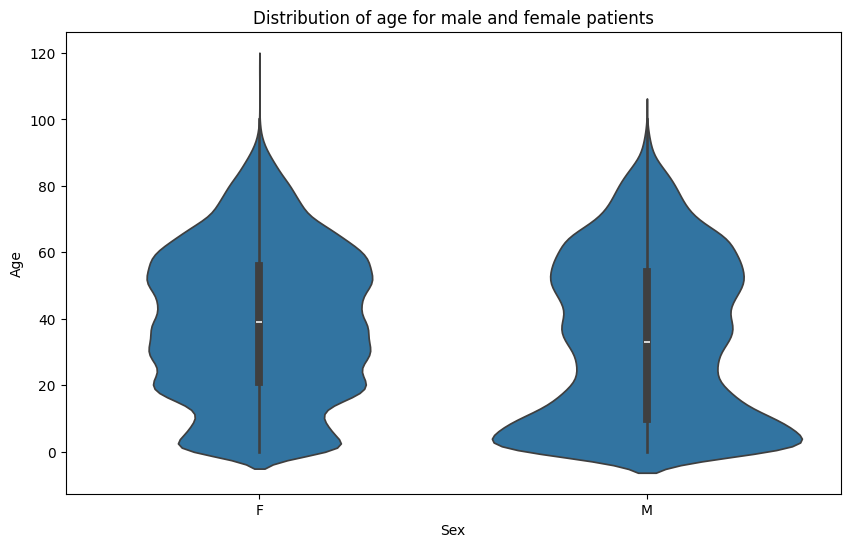

In [14]:
#Violin plot for male and female patients and their age distribution across different ages

# Violin plot of age by sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=df)
plt.title('Distribution of age for male and female patients')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

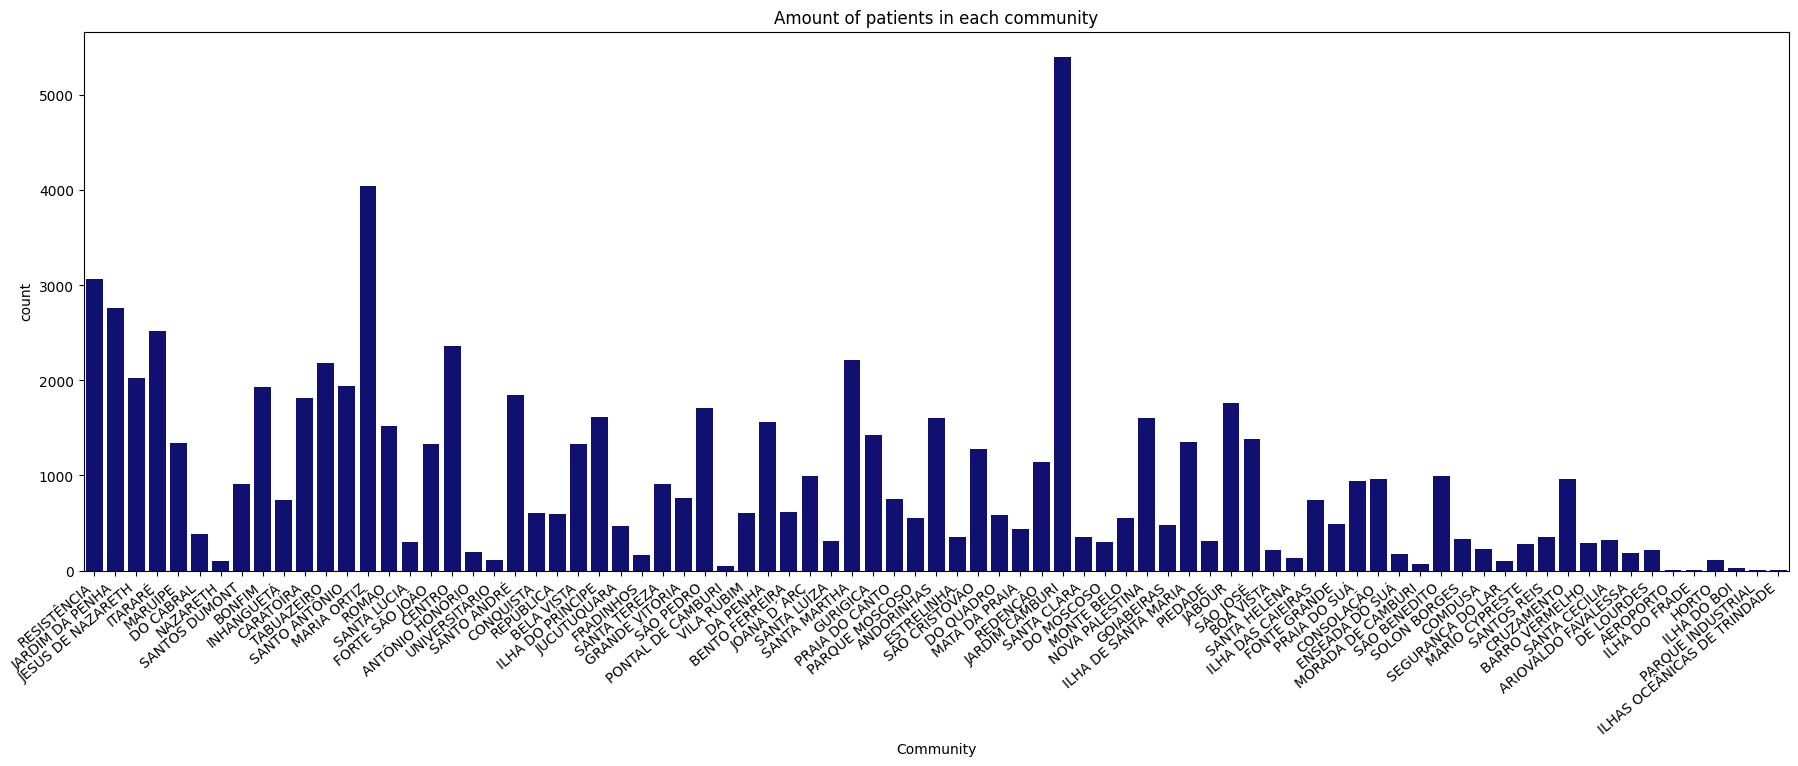

In [15]:
#Bar chart to visualize the amount of total patients for each community

# Count plot for 'Community'
plt.figure(figsize=(22, 7))
sns.countplot(x='Community', data=df, color= 'navy')
plt.title('Amount of patients in each community')
plt.xticks(rotation=40, ha='right')
plt.show()

To show the overall distribution of patients across the communities, we created this bar chart. As seen in the chart, the community with most patients is Jardim Camubri with 
more than 5000 patients. The second most represented community is Maria Obitz with a little more than 4000 patients originating from this community. 

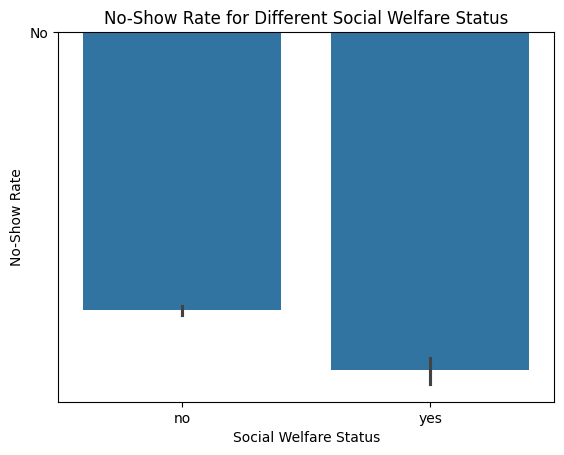

In [16]:
#Bar plot showing the no-show rate in relation to the social-welfare status of the patients

# Bar plot for 'SocialWelfare'
#Creating the barplot

sns.barplot(x='SocialWelfare', y='No-show', data=df)

#Adding labels and litle

plt.title('No-Show Rate for Different Social Welfare Status')
plt.xlabel('Social Welfare Status')
plt.ylabel('No-Show Rate')
plt.show()

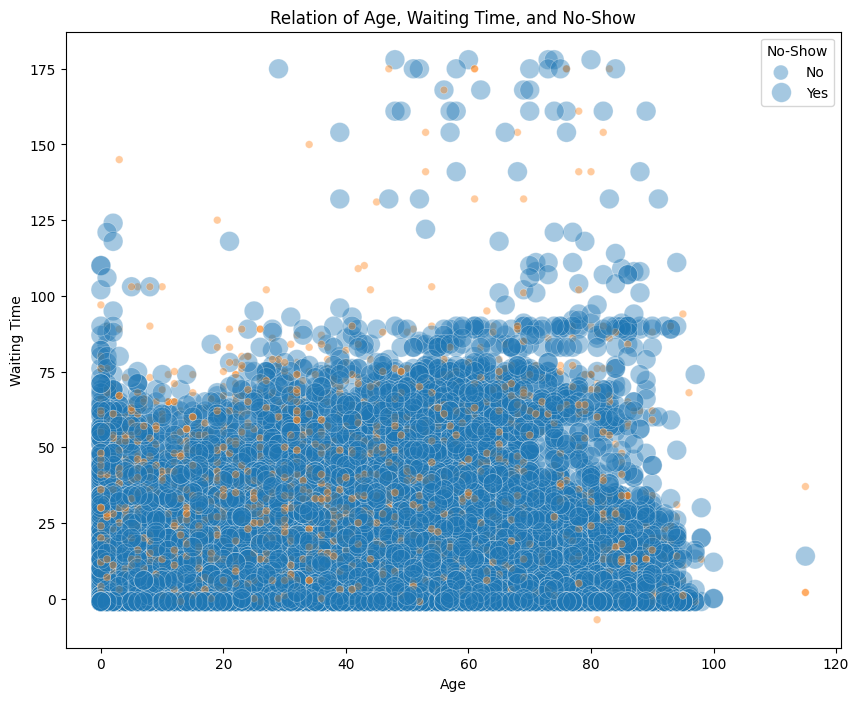

In [17]:
# Convert 'No' to 0 and 'Yes' to 1 for the 'No-show' column
df['No-show'] = (df['No-show'] == 'Yes').astype(int)

# Scatter plot with bubble size based on 'WaitingTime'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='WaitingTime', size='No-show', data=df, sizes=(30, 200), alpha=0.4, hue='No-show')

plt.title('Relation of Age, Waiting Time, and No-Show')
plt.xlabel('Age')
plt.ylabel('Waiting Time')
plt.legend(title='No-Show', labels=['No', 'Yes'])
plt.show()

This scatter plot shows the relation of age, waiting time and no-show. As seen in the plot, the waiting time seems to increase for people of progressed age. Furthermore, this seems to lead to more no-shows for older patients for a waiting time between 50 and around 80 than for younger patients, being less than 45 years old.

# 4. Data Preparation

Handcap column has wrong data values. 

In [18]:
# Wrong data in Handcap column
print(df['Handcap'].dtype)
df['Handcap'].unique()

object


array(['no', 'yes', '2', '4', '3'], dtype=object)

In [19]:
# Show the rows that contain false values
count_handcap_false = df[df['Handcap'].isin(['2','3','4'])].shape[0]
print(count_handcap_false)

153


In [20]:
# Delete the rows that contain false value 
df = df[~df['Handcap'].isin(['2', '3', '4'])]
df['Handcap'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88268 entries, 0 to 88420
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   PatientId                 88268 non-null  float64            
 1   AppointmentID             88268 non-null  int64              
 2   Sex                       88268 non-null  object             
 3   ScheduledDate             88268 non-null  datetime64[ns, UTC]
 4   AppointmentDate           88268 non-null  datetime64[ns, UTC]
 5   Age                       79474 non-null  float64            
 6   Community                 77573 non-null  object             
 7   SocialWelfare             75769 non-null  object             
 8   Hipertension              80257 non-null  object             
 9   Diabetes                  88268 non-null  object             
 10  Alcoholism                73406 non-null  object             
 11  Handcap             

Appointment date timestamp is default to 00:00:00.

This creates cases where WaitingTime has negative value when the scheduled day is the same as appointment day

In [22]:
#Amount of rows where WaitingTime has negative value
negative_count_waitingtime = len(df[df['WaitingTime'] < 0])
print(negative_count_waitingtime)

30835


In [23]:
#Showing the rows where Waiting Time has negative value. 
#It is shown that most cases have the same Scheduled Date and Appointment Date. 
#However, the Scheduled Date includes a specific timestamp while the Appointment Date defaults to 00:00 with no timestamp.
negative_waitingtime = df[df['WaitingTime'] < 0]
print(negative_waitingtime)

          PatientId  AppointmentID Sex             ScheduledDate  \
2      1.265473e+11        5745855   F 2016-05-30 12:54:18+00:00   
3      2.681769e+13        5700247   F 2016-05-16 09:15:51+00:00   
4      7.813565e+13        5656211   F 2016-05-04 07:46:23+00:00   
7      6.335895e+12        5776570   F 2016-06-06 11:24:48+00:00   
9      8.813572e+13        5769624   F 2016-06-03 09:03:20+00:00   
...             ...            ...  ..                       ...   
88403  5.776642e+12        5661408   M 2016-05-05 07:27:10+00:00   
88407  5.545616e+14        5650303   F 2016-05-03 07:36:56+00:00   
88408  7.521780e+11        5711540   M 2016-05-18 07:45:01+00:00   
88412  3.931576e+13        5705637   F 2016-05-17 07:21:43+00:00   
88419  7.854955e+10        5787782   F 2016-06-08 10:35:20+00:00   

                AppointmentDate   Age          Community SocialWelfare  \
2     2016-05-30 00:00:00+00:00  19.0    JARDIM DA PENHA            no   
3     2016-05-16 00:00:00+00:00  55

In [24]:
mask = (df['WaitingTime'] < 0) & (df['ScheduledDate'].dt.date == df['AppointmentDate'].dt.date)
df.loc[mask, 'WaitingTime'] = 0

In [25]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,Waiting_Time_Categorized
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,no,no,no,0,78,70-79
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,no,no,no,0,8,0-9
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,no,no,no,0,0,-10--1
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,0,0,-10--1
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,no,no,no,0,0,-10--1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,1.454831e+14,5772271,F,2016-06-03 15:01:39+00:00,2016-06-06 00:00:00+00:00,32.0,TABUAZEIRO,no,no,no,no,no,no,0,2,0-9
88417,3.257342e+13,5636567,M,2016-04-28 15:38:16+00:00,2016-05-05 00:00:00+00:00,7.0,NaN,no,no,no,NaN,no,yes,0,6,0-9
88418,3.888198e+12,5778538,F,2016-06-06 15:46:02+00:00,2016-06-08 00:00:00+00:00,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,0,1,0-9
88419,7.854955e+10,5787782,F,2016-06-08 10:35:20+00:00,2016-06-08 00:00:00+00:00,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,0,0,-10--1


In [26]:
# Check if there are still negative waiting time values
print(df[df['WaitingTime'] < 0])

          PatientId  AppointmentID Sex             ScheduledDate  \
14523  9.982316e+14        5686628   F 2016-05-11 13:49:20+00:00   
24371  7.839273e+12        5679978   M 2016-05-10 10:51:53+00:00   
48710  3.787482e+12        5655637   M 2016-05-04 06:50:57+00:00   
49020  2.425226e+13        5664962   F 2016-05-05 13:43:58+00:00   

                AppointmentDate   Age      Community SocialWelfare  \
14523 2016-05-05 00:00:00+00:00  81.0  SANTO ANTÔNIO           NaN   
24371 2016-05-09 00:00:00+00:00  38.0    RESISTÊNCIA            no   
48710 2016-05-03 00:00:00+00:00   7.0     TABUAZEIRO            no   
49020 2016-05-04 00:00:00+00:00   NaN     CONSOLAÇÃO            no   

      Hipertension Diabetes Alcoholism Handcap SMS_received  No-show  \
14523           no       no         no      no           no        1   
24371           no       no         no     yes           no        1   
48710           no       no        NaN      no           no        1   
49020           no  

In [27]:
# remove negative values because these cases are impossible
df = df[df['WaitingTime'] >= 0]

In [28]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,Waiting_Time_Categorized
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,no,no,no,0,78,70-79
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,no,no,no,0,8,0-9
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,no,no,no,0,0,-10--1
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,0,0,-10--1
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,no,no,no,0,0,-10--1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,1.454831e+14,5772271,F,2016-06-03 15:01:39+00:00,2016-06-06 00:00:00+00:00,32.0,TABUAZEIRO,no,no,no,no,no,no,0,2,0-9
88417,3.257342e+13,5636567,M,2016-04-28 15:38:16+00:00,2016-05-05 00:00:00+00:00,7.0,NaN,no,no,no,NaN,no,yes,0,6,0-9
88418,3.888198e+12,5778538,F,2016-06-06 15:46:02+00:00,2016-06-08 00:00:00+00:00,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,0,1,0-9
88419,7.854955e+10,5787782,F,2016-06-08 10:35:20+00:00,2016-06-08 00:00:00+00:00,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,0,0,-10--1


In [29]:
# Extract the day of the week from scheduleddate and appointmentdate column
df['ScheduledDay_weekday'] = df['ScheduledDate'].dt.strftime('%A')
df['AppointmentDay_weekday'] = df['AppointmentDate'].dt.strftime('%A')

# Weekday as number 
weekday_to_num = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['ScheduledDay_weekday'] = df['ScheduledDay_weekday'].map(weekday_to_num)
df['AppointmentDay_weekday'] = df['AppointmentDay_weekday'].map(weekday_to_num)

# Extract the month from the ScheduledDate and AppointmentDate columns
df['ScheduledDay_month'] = df['ScheduledDate'].dt.strftime('%B')  # For full month name
df['AppointmentDay_month'] = df['AppointmentDate'].dt.strftime('%B')

# Month as a number 
df['ScheduledDay_month'] = df['ScheduledDate'].dt.strftime('%m')  # Month as a number
df['AppointmentDay_month'] = df['AppointmentDate'].dt.strftime('%m')

# Extract the hour of the day from the ScheduledDate and AppointmentDate columns
df['ScheduledDay_hour'] = df['ScheduledDate'].dt.strftime('%H')
df['AppointmentDay_hour'] = df['AppointmentDate'].dt.strftime('%H')


/var/folders/ld/mczz0xmx243grk32lg665c_c0000gn/T/ipykernel_24253/1796880050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScheduledDay_weekday'] = df['ScheduledDate'].dt.strftime('%A')
/var/folders/ld/mczz0xmx243grk32lg665c_c0000gn/T/ipykernel_24253/1796880050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AppointmentDay_weekday'] = df['AppointmentDate'].dt.strftime('%A')
/var/folders/ld/mczz0xmx243grk32lg665c_c0000gn/T/ipykernel_24253/1796880050.py:7: SettingWithCopyWarning: 
A value is 

In [30]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,...,SMS_received,No-show,WaitingTime,Waiting_Time_Categorized,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_month,AppointmentDay_month,ScheduledDay_hour,AppointmentDay_hour
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,...,no,0,78,70-79,3,5,02,05,07,00
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,...,no,0,8,0-9,2,4,05,05,16,00
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,...,no,0,0,-10--1,1,1,05,05,12,00
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,...,no,0,0,-10--1,1,1,05,05,09,00
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,...,no,0,0,-10--1,3,3,05,05,07,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,1.454831e+14,5772271,F,2016-06-03 15:01:39+00:00,2016-06-06 00:00:00+00:00,32.0,TABUAZEIRO,no,no,no,...,no,0,2,0-9,5,1,06,06,15,00
88417,3.257342e+13,5636567,M,2016-04-28 15:38:16+00:00,2016-05-05 00:00:00+00:00,7.0,NaN,no,no,no,...,yes,0,6,0-9,4,4,04,05,15,00
88418,3.888198e+12,5778538,F,2016-06-06 15:46:02+00:00,2016-06-08 00:00:00+00:00,50.0,MARIA ORTIZ,NaN,no,no,...,no,0,1,0-9,1,3,06,06,15,00
88419,7.854955e+10,5787782,F,2016-06-08 10:35:20+00:00,2016-06-08 00:00:00+00:00,39.0,PRAIA DO SUÁ,no,no,no,...,no,0,0,-10--1,3,3,06,06,10,00


In [31]:
# Sort the DataFrame
df = df.sort_values(by=['PatientId', 'ScheduledDate'])

# Shift the 'Noshow' column within each group
df['PreviousNoShow'] = df.groupby('PatientId')['No-show'].shift()

# Convert 'PreviousNoShow' to binary: 1 for 'Yes' (no-show), 0 for 'No'
df['PreviousNoShow'] = df['PreviousNoShow'].map({'Yes': 1, 'No': 0})

# Fill missing values with 0 for patients with no previous appointments
df['PreviousNoShow'] = df['PreviousNoShow'].fillna(0)

df['PreviousNoShow'] = df['PreviousNoShow'].astype(int)


In [32]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,...,No-show,WaitingTime,Waiting_Time_Categorized,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_month,AppointmentDay_month,ScheduledDay_hour,AppointmentDay_hour,PreviousNoShow
19207,3.921784e+04,5751990,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44.0,PRAIA DO SUÁ,no,no,no,...,0,2,0-9,2,5,05,06,10,00,0
78933,4.374176e+04,5760144,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39.0,MARIA ORTIZ,no,no,yes,...,0,0,-10--1,3,3,06,06,14,00,0
82167,9.377953e+04,5712759,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33.0,CENTRO,no,no,no,...,0,0,-10--1,3,3,05,05,09,00,0
4741,1.417242e+05,5637648,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12.0,FORTE SÃO JOÃO,no,no,no,...,0,2,0-9,5,1,04,05,07,00,0
80821,5.376153e+05,5637728,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14.0,FORTE SÃO JOÃO,no,no,no,...,0,6,0-9,5,5,04,05,07,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38782,9.999320e+14,5736368,M,2016-05-25 08:14:58+00:00,2016-05-25 00:00:00+00:00,NaN,JABOUR,no,no,no,...,0,0,-10--1,3,3,05,05,08,00,0
704,9.999320e+14,5772701,M,2016-06-03 16:04:03+00:00,2016-06-07 00:00:00+00:00,90.0,JABOUR,no,no,no,...,0,3,0-9,5,2,06,06,16,00,0
46221,9.999350e+14,5639453,M,2016-04-29 09:07:06+00:00,2016-04-29 00:00:00+00:00,NaN,JESUS DE NAZARETH,no,no,no,...,0,0,-10--1,5,5,04,04,09,00,0
30310,9.999465e+14,5649678,M,2016-05-03 07:08:13+00:00,2016-05-03 00:00:00+00:00,65.0,NaN,NaN,yes,no,...,0,0,-10--1,2,2,05,05,07,00,0


In [33]:
# Group by 'PatientId' and calculate the mode age, excluding the rows that have the same 'PatientID' and a non-value in the 'Age' column.
age_mapping = df.dropna(subset=['Age']).groupby('PatientId')['Age'].agg(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else pd.NA)

# Fill missing age values
df['Age'] = df.apply(lambda row: age_mapping[row['PatientId']] if pd.isna(row['Age']) and row['PatientId'] in age_mapping else row['Age'], axis=1)

In [34]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,...,No-show,WaitingTime,Waiting_Time_Categorized,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_month,AppointmentDay_month,ScheduledDay_hour,AppointmentDay_hour,PreviousNoShow
19207,3.921784e+04,5751990,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44.0,PRAIA DO SUÁ,no,no,no,...,0,2,0-9,2,5,05,06,10,00,0
78933,4.374176e+04,5760144,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39.0,MARIA ORTIZ,no,no,yes,...,0,0,-10--1,3,3,06,06,14,00,0
82167,9.377953e+04,5712759,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33.0,CENTRO,no,no,no,...,0,0,-10--1,3,3,05,05,09,00,0
4741,1.417242e+05,5637648,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12.0,FORTE SÃO JOÃO,no,no,no,...,0,2,0-9,5,1,04,05,07,00,0
80821,5.376153e+05,5637728,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14.0,FORTE SÃO JOÃO,no,no,no,...,0,6,0-9,5,5,04,05,07,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38782,9.999320e+14,5736368,M,2016-05-25 08:14:58+00:00,2016-05-25 00:00:00+00:00,90.0,JABOUR,no,no,no,...,0,0,-10--1,3,3,05,05,08,00,0
704,9.999320e+14,5772701,M,2016-06-03 16:04:03+00:00,2016-06-07 00:00:00+00:00,90.0,JABOUR,no,no,no,...,0,3,0-9,5,2,06,06,16,00,0
46221,9.999350e+14,5639453,M,2016-04-29 09:07:06+00:00,2016-04-29 00:00:00+00:00,NaN,JESUS DE NAZARETH,no,no,no,...,0,0,-10--1,5,5,04,04,09,00,0
30310,9.999465e+14,5649678,M,2016-05-03 07:08:13+00:00,2016-05-03 00:00:00+00:00,65.0,NaN,NaN,yes,no,...,0,0,-10--1,2,2,05,05,07,00,0


In [35]:
# Changing data type of scheduled date and appointment date to float for the following correlation analysis
df['ScheduledDate'] = df['ScheduledDate'].apply(lambda x: x.timestamp())
df['AppointmentDate'] = df['AppointmentDate'].apply(lambda x: x.timestamp())

In [36]:
# ScheduledDate and AppointmentDate are converted
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,...,No-show,WaitingTime,Waiting_Time_Categorized,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_month,AppointmentDay_month,ScheduledDay_hour,AppointmentDay_hour,PreviousNoShow
19207,3.921784e+04,5751990,F,1.464692e+09,1.464912e+09,44.0,PRAIA DO SUÁ,no,no,no,...,0,2,0-9,2,5,05,06,10,00,0
78933,4.374176e+04,5760144,M,1.464791e+09,1.464739e+09,39.0,MARIA ORTIZ,no,no,yes,...,0,0,-10--1,3,3,06,06,14,00,0
82167,9.377953e+04,5712759,F,1.463563e+09,1.463530e+09,33.0,CENTRO,no,no,no,...,0,0,-10--1,3,3,05,05,09,00,0
4741,1.417242e+05,5637648,M,1.461914e+09,1.462147e+09,12.0,FORTE SÃO JOÃO,no,no,no,...,0,2,0-9,5,1,04,05,07,00,0
80821,5.376153e+05,5637728,F,1.461914e+09,1.462493e+09,14.0,FORTE SÃO JOÃO,no,no,no,...,0,6,0-9,5,5,04,05,07,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38782,9.999320e+14,5736368,M,1.464164e+09,1.464134e+09,90.0,JABOUR,no,no,no,...,0,0,-10--1,3,3,05,05,08,00,0
704,9.999320e+14,5772701,M,1.464970e+09,1.465258e+09,90.0,JABOUR,no,no,no,...,0,3,0-9,5,2,06,06,16,00,0
46221,9.999350e+14,5639453,M,1.461921e+09,1.461888e+09,NaN,JESUS DE NAZARETH,no,no,no,...,0,0,-10--1,5,5,04,04,09,00,0
30310,9.999465e+14,5649678,M,1.462259e+09,1.462234e+09,65.0,NaN,NaN,yes,no,...,0,0,-10--1,2,2,05,05,07,00,0


In [37]:
# Defining all the potential features for the training (Model 2)
features= ['Sex','Age','Community','SocialWelfare','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','ScheduledDay_weekday','AppointmentDay_weekday','ScheduledDay_month','AppointmentDay_month','PreviousNoShow','ScheduledDay_hour','AppointmentDay_hour']
X = df[features]
y = df['No-show']


In [38]:
print("Initial length:", len(X), "rows")
print(X.isnull().sum())

Initial length: 88264 rows
Sex                           0
Age                        3773
Community                 10695
SocialWelfare             12498
Hipertension               8011
Diabetes                      0
Alcoholism                14861
Handcap                       0
SMS_received                  0
WaitingTime                   0
ScheduledDay_weekday          0
AppointmentDay_weekday        0
ScheduledDay_month            0
AppointmentDay_month          0
PreviousNoShow                0
ScheduledDay_hour             0
AppointmentDay_hour           0
dtype: int64


In [39]:
X.describe()
# Age median

,Age,WaitingTime,ScheduledDay_weekday,AppointmentDay_weekday,PreviousNoShow
count,84491.000000,88264.000000,88264.000000,88264.000000,88264.0
mean,37.092104,9.565633,2.850573,2.855740,0.0
std,23.101219,15.085754,1.377782,1.369989,0.0
min,0.000000,0.000000,1.000000,1.000000,0.0
25%,18.000000,0.000000,2.000000,2.000000,0.0
50%,37.000000,3.000000,3.000000,3.000000,0.0
75%,55.000000,14.000000,4.000000,4.000000,0.0
max,115.000000,178.000000,6.000000,6.000000,0.0


In [40]:
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

In [41]:
# Conduct a train-test split with a 30% test ratio and a random state of 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61784 entries, 70488 to 23740
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sex                     61784 non-null  object 
 1   Age                     59150 non-null  float64
 2   Community               54299 non-null  object 
 3   SocialWelfare           53044 non-null  object 
 4   Hipertension            56176 non-null  object 
 5   Diabetes                61784 non-null  object 
 6   Alcoholism              51394 non-null  object 
 7   Handcap                 61784 non-null  object 
 8   SMS_received            61784 non-null  object 
 9   WaitingTime             61784 non-null  int64  
 10  ScheduledDay_weekday    61784 non-null  int64  
 11  AppointmentDay_weekday  61784 non-null  int64  
 12  ScheduledDay_month      61784 non-null  object 
 13  AppointmentDay_month    61784 non-null  object 
 14  PreviousNoShow          61784 non-null 

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")
ohe = OneHotEncoder(drop = 'if_binary', sparse_output=False, handle_unknown='ignore')

In [44]:
categorical_preprocessing = Pipeline(
[
    ('imputer_mode', imputer_mode),
    ('onehot', ohe),
])

numerical_preprocessing = Pipeline([
    ('imputer_median', imputer_median)
])

preprocessing = ColumnTransformer(
                    [
                        ('categorical', categorical_preprocessing, ['Sex', 'Community', 'SocialWelfare', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']),
                        ('numerical', numerical_preprocessing, ['Age']),
                    ], remainder= 'passthrough')

transformed_X_train = preprocessing.fit_transform(X_train)
transformed_X_train .columns

Index(['categorical__Sex_M', 'categorical__Community_AEROPORTO',
       'categorical__Community_ANDORINHAS',
       'categorical__Community_ANTÔNIO HONÓRIO',
       'categorical__Community_ARIOVALDO FAVALESSA',
       'categorical__Community_BARRO VERMELHO',
       'categorical__Community_BELA VISTA',
       'categorical__Community_BENTO FERREIRA',
       'categorical__Community_BOA VISTA', 'categorical__Community_BONFIM',
       'categorical__Community_CARATOÍRA', 'categorical__Community_CENTRO',
       'categorical__Community_COMDUSA', 'categorical__Community_CONQUISTA',
       'categorical__Community_CONSOLAÇÃO',
       'categorical__Community_CRUZAMENTO', 'categorical__Community_DA PENHA',
       'categorical__Community_DE LOURDES', 'categorical__Community_DO CABRAL',
       'categorical__Community_DO MOSCOSO', 'categorical__Community_DO QUADRO',
       'categorical__Community_ENSEADA DO SUÁ',
       'categorical__Community_ESTRELINHA',
       'categorical__Community_FONTE GRANDE',

In [45]:
# checking X_test for missing values
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26480 entries, 78363 to 47331
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sex                     26480 non-null  object 
 1   Age                     25341 non-null  float64
 2   Community               23270 non-null  object 
 3   SocialWelfare           22722 non-null  object 
 4   Hipertension            24077 non-null  object 
 5   Diabetes                26480 non-null  object 
 6   Alcoholism              22009 non-null  object 
 7   Handcap                 26480 non-null  object 
 8   SMS_received            26480 non-null  object 
 9   WaitingTime             26480 non-null  int64  
 10  ScheduledDay_weekday    26480 non-null  int64  
 11  AppointmentDay_weekday  26480 non-null  int64  
 12  ScheduledDay_month      26480 non-null  object 
 13  AppointmentDay_month    26480 non-null  object 
 14  PreviousNoShow          26480 non-null 

In [46]:
transformed_X_test = preprocessing.fit_transform(X_test)
transformed_X_test.columns

Index(['categorical__Sex_M', 'categorical__Community_AEROPORTO',
       'categorical__Community_ANDORINHAS',
       'categorical__Community_ANTÔNIO HONÓRIO',
       'categorical__Community_ARIOVALDO FAVALESSA',
       'categorical__Community_BARRO VERMELHO',
       'categorical__Community_BELA VISTA',
       'categorical__Community_BENTO FERREIRA',
       'categorical__Community_BOA VISTA', 'categorical__Community_BONFIM',
       'categorical__Community_CARATOÍRA', 'categorical__Community_CENTRO',
       'categorical__Community_COMDUSA', 'categorical__Community_CONQUISTA',
       'categorical__Community_CONSOLAÇÃO',
       'categorical__Community_CRUZAMENTO', 'categorical__Community_DA PENHA',
       'categorical__Community_DE LOURDES', 'categorical__Community_DO CABRAL',
       'categorical__Community_DO MOSCOSO', 'categorical__Community_DO QUADRO',
       'categorical__Community_ENSEADA DO SUÁ',
       'categorical__Community_ESTRELINHA',
       'categorical__Community_FONTE GRANDE',

In [47]:
difference = list(set(transformed_X_train) - set(transformed_X_test))

print("Missing category in test set", difference)

Missing category in test set ['categorical__Community_PARQUE INDUSTRIAL']


In [48]:
for col in difference:
    transformed_X_test[col] = 0

In [49]:
transformed_X_test

,categorical__Sex_M,categorical__Community_AEROPORTO,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,...,numerical__Age,remainder__WaitingTime,remainder__ScheduledDay_weekday,remainder__AppointmentDay_weekday,remainder__ScheduledDay_month,remainder__AppointmentDay_month,remainder__PreviousNoShow,remainder__ScheduledDay_hour,remainder__AppointmentDay_hour,categorical__Community_PARQUE INDUSTRIAL
78363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0,5,5,06,06,0,10,00,0
72988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,17.0,0,1,1,05,05,0,09,00,0
71108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,5,3,2,05,05,0,15,00,0
67279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,42,3,4,04,06,0,13,00,0
68558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,4,4,06,06,0,14,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,20,5,5,05,06,0,15,00,0
34528,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,18.0,1,2,4,05,06,0,07,00,0
11922,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0,3,3,05,05,0,09,00,0
9954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0,3,3,05,05,0,07,00,0


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# 4.2. Feature Selection

#### K Best

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select = SelectKBest(score_func=chi2, k=20)
select.fit_transform(transformed_X_train,y_train)

# Showing indices and scores of the selected features
selected_indices = select.get_support(indices=True)
selected_scores = select.scores_[selected_indices]

selected_features = pd.DataFrame({
    'Feature': transformed_X_train.columns[selected_indices],
    'Score': selected_scores
})

# Print feature names
selected_features = selected_features.sort_values(by='Score', ascending=False)
print("Selected best 20 features:")
print(selected_features)

Selected best 20 features:
                                     Feature         Score
17                    remainder__WaitingTime  44449.265242
16                            numerical__Age   3055.754703
15             categorical__SMS_received_yes    671.587491
19              remainder__ScheduledDay_hour    197.251292
18             remainder__ScheduledDay_month    168.871640
13             categorical__Hipertension_yes     59.366436
3             categorical__Community_ITARARÉ     40.979490
12            categorical__SocialWelfare_yes     36.577994
11      categorical__Community_SANTOS DUMONT     35.579044
9        categorical__Community_SANTA MARTHA     26.037397
4     categorical__Community_JARDIM DA PENHA     19.625967
5   categorical__Community_JESUS DE NAZARETH     11.277284
14                 categorical__Diabetes_yes     11.166134
8         categorical__Community_SANTA CLARA     10.952007
10      categorical__Community_SANTO ANTÔNIO     10.408147
6      categorical__Community

#### Information Gain

In [52]:
transformed_X_train

,categorical__Sex_M,categorical__Community_AEROPORTO,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,...,categorical__SMS_received_yes,numerical__Age,remainder__WaitingTime,remainder__ScheduledDay_weekday,remainder__AppointmentDay_weekday,remainder__ScheduledDay_month,remainder__AppointmentDay_month,remainder__PreviousNoShow,remainder__ScheduledDay_hour,remainder__AppointmentDay_hour
70488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78.0,55,4,4,03,05,0,13,00
59143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,74.0,12,2,1,05,06,0,11,00
28826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.0,5,4,3,05,05,0,09,00
41517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,60.0,0,5,5,06,06,0,14,00
1654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,71.0,3,1,5,05,06,0,07,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.0,0,3,3,05,05,0,07,00
73815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.0,0,5,5,05,05,0,12,00
74734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46.0,0,2,2,05,05,0,15,00
26703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,0,2,2,05,05,0,07,00


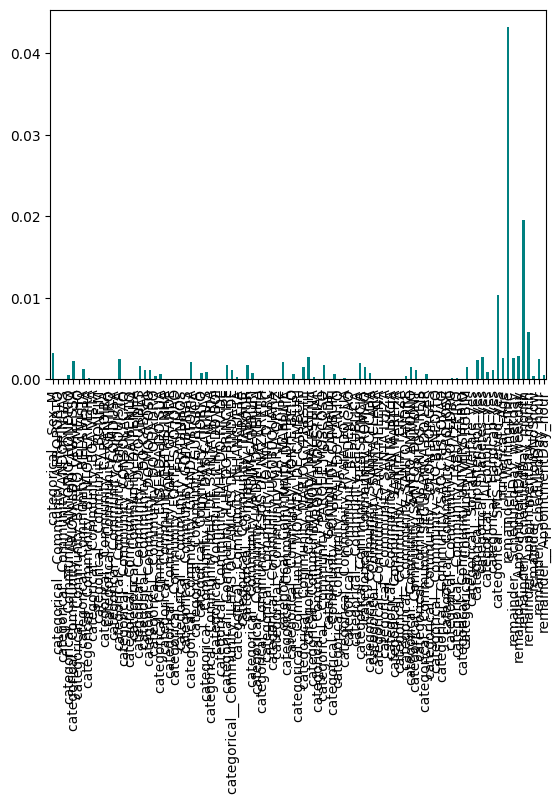

In [53]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances_information_gain = mutual_info_classif(transformed_X_train, y_train)
feature_importances_information_gain = pd.Series(importances_information_gain, transformed_X_train.columns[0:len(transformed_X_train.columns)])
feature_importances_information_gain.plot(kind="bar", color="teal")
plt.show()

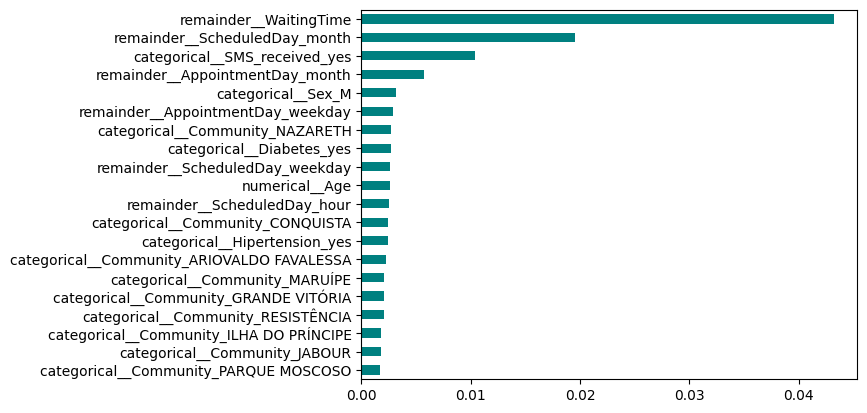

In [54]:
# Selecting the top 20 features
top_20_features = feature_importances_information_gain.sort_values(ascending=True).tail(20)

top_20_features.plot(kind="barh", color="teal")  # Changed to horizontal bar for better readability
plt.show()


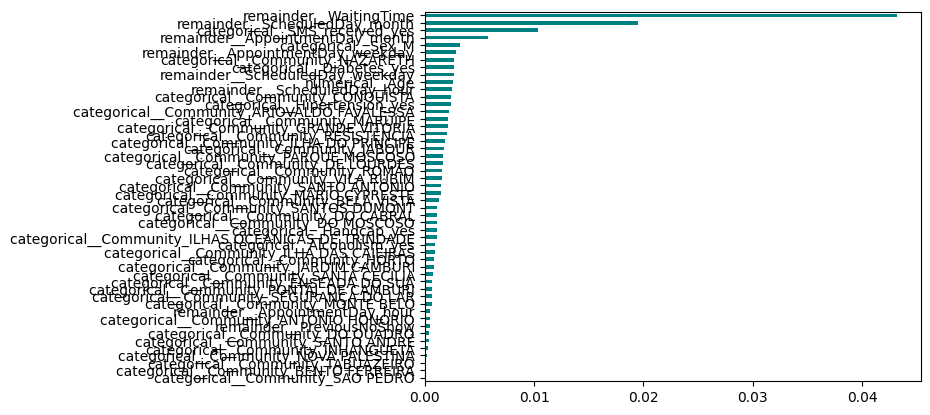

In [55]:
# Selecting the top 50 features
top_50_features = feature_importances_information_gain.sort_values(ascending=True).tail(50)

top_50_features.plot(kind="barh", color="teal")  # Changed to horizontal bar for better readability
plt.show()

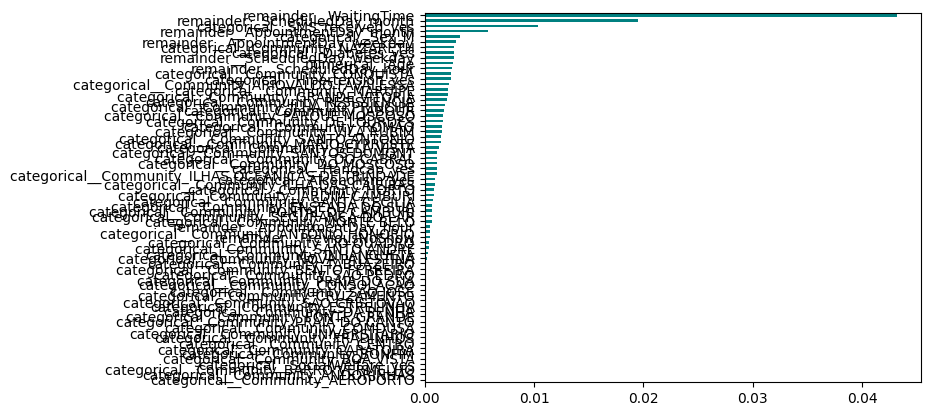

In [56]:
# Selecting the top 70 features
top_70_features = feature_importances_information_gain.sort_values(ascending=True).tail(70)

top_70_features.plot(kind="barh", color="teal")  # Changed to horizontal bar for better readability
plt.show()

In [57]:
top_20_features.index

Index(['categorical__Community_PARQUE MOSCOSO',
       'categorical__Community_JABOUR',
       'categorical__Community_ILHA DO PRÍNCIPE',
       'categorical__Community_RESISTÊNCIA',
       'categorical__Community_GRANDE VITÓRIA',
       'categorical__Community_MARUÍPE',
       'categorical__Community_ARIOVALDO FAVALESSA',
       'categorical__Hipertension_yes', 'categorical__Community_CONQUISTA',
       'remainder__ScheduledDay_hour', 'numerical__Age',
       'remainder__ScheduledDay_weekday', 'categorical__Diabetes_yes',
       'categorical__Community_NAZARETH', 'remainder__AppointmentDay_weekday',
       'categorical__Sex_M', 'remainder__AppointmentDay_month',
       'categorical__SMS_received_yes', 'remainder__ScheduledDay_month',
       'remainder__WaitingTime'],
      dtype='object')

In [58]:
top_50_features.index

Index(['categorical__Community_SÃO PEDRO',
       'categorical__Community_BENTO FERREIRA',
       'categorical__Community_TABUAZEIRO',
       'categorical__Community_NOVA PALESTINA',
       'categorical__Community_INHANGUETÁ',
       'categorical__Community_SANTO ANDRÉ',
       'categorical__Community_DO QUADRO', 'remainder__PreviousNoShow',
       'categorical__Community_ANTÔNIO HONÓRIO',
       'remainder__AppointmentDay_hour', 'categorical__Community_MONTE BELO',
       'categorical__Community_SEGURANÇA DO LAR',
       'categorical__Community_PONTAL DE CAMBURI',
       'categorical__Community_ENSEADA DO SUÁ',
       'categorical__Community_SANTA CECÍLIA',
       'categorical__Community_JARDIM CAMBURI', 'categorical__Community_HORTO',
       'categorical__Community_ILHA DAS CAIEIRAS',
       'categorical__Alcoholism_yes',
       'categorical__Community_ILHAS OCEÂNICAS DE TRINDADE',
       'categorical__Handcap_yes', 'categorical__Community_DO MOSCOSO',
       'categorical__Community_

In [59]:
top_70_features.index

Index(['categorical__Community_AEROPORTO', 'categorical__Community_ANDORINHAS',
       'categorical__Community_BARRO VERMELHO',
       'categorical__SocialWelfare_yes', 'categorical__Community_BOA VISTA',
       'categorical__Community_BONFIM', 'categorical__Community_CARATOÍRA',
       'categorical__Community_CENTRO', 'categorical__Community_FRADINHOS',
       'categorical__Community_UNIVERSITÁRIO',
       'categorical__Community_COMDUSA',
       'categorical__Community_PRAIA DO CANTO',
       'categorical__Community_FONTE GRANDE',
       'categorical__Community_DA PENHA', 'categorical__Community_ESTRELINHA',
       'categorical__Community_SÃO CRISTÓVÃO',
       'categorical__Community_CRUZAMENTO', 'categorical__Community_SÃO JOSÉ',
       'categorical__Community_CONSOLAÇÃO',
       'categorical__Community_PRAIA DO SUÁ',
       'categorical__Community_SÃO PEDRO',
       'categorical__Community_BENTO FERREIRA',
       'categorical__Community_TABUAZEIRO',
       'categorical__Community_

# 5. Model Building and Optimization

## Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators=50,random_state=42)

In [61]:
selected_X_train = transformed_X_train

In [62]:
selected_X_train

,categorical__Sex_M,categorical__Community_AEROPORTO,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,...,categorical__SMS_received_yes,numerical__Age,remainder__WaitingTime,remainder__ScheduledDay_weekday,remainder__AppointmentDay_weekday,remainder__ScheduledDay_month,remainder__AppointmentDay_month,remainder__PreviousNoShow,remainder__ScheduledDay_hour,remainder__AppointmentDay_hour
70488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78.0,55,4,4,03,05,0,13,00
59143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,74.0,12,2,1,05,06,0,11,00
28826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.0,5,4,3,05,05,0,09,00
41517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,60.0,0,5,5,06,06,0,14,00
1654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,71.0,3,1,5,05,06,0,07,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.0,0,3,3,05,05,0,07,00
73815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.0,0,5,5,05,05,0,12,00
74734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46.0,0,2,2,05,05,0,15,00
26703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,54.0,0,2,2,05,05,0,07,00


In [63]:
selected_X_test = transformed_X_test

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

from sklearn.metrics import f1_score, make_scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Set up the grid search
grid_search = GridSearchCV(rf, param_grid, verbose=3, cv=5, scoring=f1_scorer)
grid_search.fit(selected_X_train, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(selected_X_train, y_train)

In [64]:
rf.fit(selected_X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

y_pred = best_rf.predict(selected_X_test)

# Evaluate the model using F1 score
test_f1_score = f1_score(y_test, y_pred, average='macro')
print("Test set F1 score:", test_f1_score)

In [68]:
test = pd.read_csv('/Users/jinlinchen/Documents/Study/HWR Berlin/Data Science/Data Science Project/test.csv')

In [69]:
test['ScheduledDate'] = pd.to_datetime(test['ScheduledDate'])
test['AppointmentDate'] = pd.to_datetime(test['AppointmentDate'])
test['WaitingTime'] = (test['AppointmentDate'] - test['ScheduledDate']).dt.days

# Extract the day of the week from scheduleddate and appointmentdate column
test['ScheduledDay_weekday'] = test['ScheduledDate'].dt.strftime('%A')
test['AppointmentDay_weekday'] = test['AppointmentDate'].dt.strftime('%A')

weekday_to_num = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
test['ScheduledDay_weekday'] = test['ScheduledDay_weekday'].map(weekday_to_num)
test['AppointmentDay_weekday'] = test['AppointmentDay_weekday'].map(weekday_to_num)

# Extract the month from the ScheduledDate and AppointmentDate columns
test['ScheduledDay_month'] = test['ScheduledDate'].dt.strftime('%B')  
test['AppointmentDay_month'] = test['AppointmentDate'].dt.strftime('%B')



test['ScheduledDay_month'] = test['ScheduledDate'].dt.strftime('%m')  
test['AppointmentDay_month'] = test['AppointmentDate'].dt.strftime('%m')

# Extract the hour of the day from the ScheduledDate and AppointmentDate columns
test['ScheduledDay_hour'] = test['ScheduledDate'].dt.strftime('%H')
test['AppointmentDay_hour'] = test['AppointmentDate'].dt.strftime('%H')


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   PatientId               22106 non-null  float64            
 1   AppointmentID           22106 non-null  int64              
 2   Sex                     22106 non-null  object             
 3   ScheduledDate           22106 non-null  datetime64[ns, UTC]
 4   AppointmentDate         22106 non-null  datetime64[ns, UTC]
 5   Age                     19955 non-null  float64            
 6   Community               19461 non-null  object             
 7   SocialWelfare           19043 non-null  object             
 8   Hipertension            20089 non-null  object             
 9   Diabetes                22106 non-null  object             
 10  Alcoholism              18371 non-null  object             
 11  Handcap                 22106 non-null  o

In [71]:
mask = (test['WaitingTime'] < 0) & (test['ScheduledDate'].dt.date == test['AppointmentDate'].dt.date)
test.loc[mask, 'WaitingTime'] = 0

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   PatientId               22106 non-null  float64            
 1   AppointmentID           22106 non-null  int64              
 2   Sex                     22106 non-null  object             
 3   ScheduledDate           22106 non-null  datetime64[ns, UTC]
 4   AppointmentDate         22106 non-null  datetime64[ns, UTC]
 5   Age                     19955 non-null  float64            
 6   Community               19461 non-null  object             
 7   SocialWelfare           19043 non-null  object             
 8   Hipertension            20089 non-null  object             
 9   Diabetes                22106 non-null  object             
 10  Alcoholism              18371 non-null  object             
 11  Handcap                 22106 non-null  o

In [73]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,...,No-show,WaitingTime,Waiting_Time_Categorized,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_month,AppointmentDay_month,ScheduledDay_hour,AppointmentDay_hour,PreviousNoShow
19207,3.921784e+04,5751990,F,1.464692e+09,1.464912e+09,44.0,PRAIA DO SUÁ,no,no,no,...,0,2,0-9,2,5,05,06,10,00,0
78933,4.374176e+04,5760144,M,1.464791e+09,1.464739e+09,39.0,MARIA ORTIZ,no,no,yes,...,0,0,-10--1,3,3,06,06,14,00,0
82167,9.377953e+04,5712759,F,1.463563e+09,1.463530e+09,33.0,CENTRO,no,no,no,...,0,0,-10--1,3,3,05,05,09,00,0
4741,1.417242e+05,5637648,M,1.461914e+09,1.462147e+09,12.0,FORTE SÃO JOÃO,no,no,no,...,0,2,0-9,5,1,04,05,07,00,0
80821,5.376153e+05,5637728,F,1.461914e+09,1.462493e+09,14.0,FORTE SÃO JOÃO,no,no,no,...,0,6,0-9,5,5,04,05,07,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38782,9.999320e+14,5736368,M,1.464164e+09,1.464134e+09,90.0,JABOUR,no,no,no,...,0,0,-10--1,3,3,05,05,08,00,0
704,9.999320e+14,5772701,M,1.464970e+09,1.465258e+09,90.0,JABOUR,no,no,no,...,0,3,0-9,5,2,06,06,16,00,0
46221,9.999350e+14,5639453,M,1.461921e+09,1.461888e+09,NaN,JESUS DE NAZARETH,no,no,no,...,0,0,-10--1,5,5,04,04,09,00,0
30310,9.999465e+14,5649678,M,1.462259e+09,1.462234e+09,65.0,NaN,NaN,yes,no,...,0,0,-10--1,2,2,05,05,07,00,0


In [74]:
# The column PreviousNoShow in test will only contain binary values. If the cumulative Noshow in the recorded data 
# is bigger than 0, then the PreviousNoShow in the Testdata will be 1. 

# Calculate the cumulative no-shows for each PatientId in the recorded data
df['CumulativeNoShows'] = df.groupby('PatientId')['No-show'].cumsum()

# Get the last cumulative no-show count for each PatientId and convert it to binary
last_no_shows_binary = df.groupby('PatientId')['CumulativeNoShows'].max().apply(lambda x: 1 if x > 0 else 0).reset_index()
last_no_shows_binary.rename(columns={'CumulativeNoShows': 'PreviousNoShow'}, inplace=True)

# Merge this binary value with test (dataframe) to get the binary indication of any previous no-shows
test = test.merge(last_no_shows_binary, on='PatientId', how='left')

# Fill NaN values with 0 for patients with no previous records in df
test['PreviousNoShow'] = test['PreviousNoShow'].fillna(0)

# Convert 'PreviousNoShow' to an integer, since it should be a whole number
test['PreviousNoShow'] = test['PreviousNoShow'].astype(int)



In [75]:
# Group by 'PatientId' and calculate the mode age, excluding the rows that have the same 'PatientID' and a non-value in the 'Age' column.
age_mapping = test.dropna(subset=['Age']).groupby('PatientId')['Age'].agg(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else pd.NA)

# Fill missing age values
test['Age'] = test.apply(lambda row: age_mapping[row['PatientId']] if pd.isna(row['Age']) and row['PatientId'] in age_mapping else row['Age'], axis=1)

In [76]:
# Changing data type of scheduled date and appointment date to float for the following correlation analysis
test['ScheduledDate'] = test['ScheduledDate'].apply(lambda x: x.timestamp())
test['AppointmentDate'] = test['AppointmentDate'].apply(lambda x: x.timestamp())

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientId               22106 non-null  float64
 1   AppointmentID           22106 non-null  int64  
 2   Sex                     22106 non-null  object 
 3   ScheduledDate           22106 non-null  float64
 4   AppointmentDate         22106 non-null  float64
 5   Age                     20559 non-null  float64
 6   Community               19461 non-null  object 
 7   SocialWelfare           19043 non-null  object 
 8   Hipertension            20089 non-null  object 
 9   Diabetes                22106 non-null  object 
 10  Alcoholism              18371 non-null  object 
 11  Handcap                 22106 non-null  object 
 12  SMS_received            22106 non-null  object 
 13  WaitingTime             22106 non-null  int64  
 14  ScheduledDay_weekday    22106 non-null

In [78]:
# Defining all the potential features for the training (model 2)

features= ['Sex','Age','Community','SocialWelfare','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','ScheduledDay_weekday','AppointmentDay_weekday','ScheduledDay_month','AppointmentDay_month','PreviousNoShow','ScheduledDay_hour','AppointmentDay_hour']
test_features = test[features]

In [79]:
test_features

,Sex,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_month,AppointmentDay_month,PreviousNoShow,ScheduledDay_hour,AppointmentDay_hour
0,F,30.0,SANTO ANTÔNIO,no,no,no,no,no,yes,13,2,2,04,05,0,09,00
1,M,51.0,CRUZAMENTO,no,no,no,NaN,no,no,0,1,2,05,05,0,07,00
2,M,37.0,CENTRO,no,no,no,no,no,no,1,1,3,05,05,0,08,00
3,M,62.0,JARDIM DA PENHA,no,no,no,no,no,yes,19,3,2,04,05,0,15,00
4,M,69.0,PRAIA DO SUÁ,no,no,no,no,no,yes,20,2,2,05,05,0,09,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22101,F,49.0,DE LOURDES,no,no,no,no,no,no,4,5,3,05,05,1,18,00
22102,M,24.0,JARDIM CAMBURI,no,no,no,NaN,no,no,0,4,4,05,05,0,15,00
22103,F,56.0,JARDIM CAMBURI,no,no,no,no,no,no,68,2,1,03,05,0,09,00
22104,F,40.0,ENSEADA DO SUÁ,no,no,no,no,no,yes,6,1,1,05,06,0,13,00


In [80]:
test_features['Handcap'].unique()

array(['no', 'yes', '3', '2'], dtype=object)

In [81]:
most_frequent_value_handcap = test_features['Handcap'].mode()[0]
most_frequent_value_handcap

'no'

In [82]:
test_features['Handcap'] = test_features['Handcap'].replace(["2", "3"], 'no')

/var/folders/ld/mczz0xmx243grk32lg665c_c0000gn/T/ipykernel_24253/2560639782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Handcap'] = test_features['Handcap'].replace(["2", "3"], 'no')


In [83]:
test_features['Handcap'].unique()

array(['no', 'yes'], dtype=object)

In [84]:
transformed_test_features = preprocessing.fit_transform(test_features)

In [85]:
transformed_test_features

,categorical__Sex_M,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,categorical__Community_CARATOÍRA,...,categorical__SMS_received_yes,numerical__Age,remainder__WaitingTime,remainder__ScheduledDay_weekday,remainder__AppointmentDay_weekday,remainder__ScheduledDay_month,remainder__AppointmentDay_month,remainder__PreviousNoShow,remainder__ScheduledDay_hour,remainder__AppointmentDay_hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,30.0,13,2,2,04,05,0,09,00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.0,0,1,2,05,05,0,07,00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.0,1,1,3,05,05,0,08,00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,62.0,19,3,2,04,05,0,15,00
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,69.0,20,2,2,05,05,0,09,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,49.0,4,5,3,05,05,1,18,00
22102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,24.0,0,4,4,05,05,0,15,00
22103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.0,68,2,1,03,05,0,09,00
22104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,40.0,6,1,1,05,06,0,13,00


In [86]:
difference = list(set(transformed_X_train) - set(transformed_test_features))

print("Missing category in test set", difference)
for col in difference:
    transformed_test_features[col] = 0

Missing category in test set ['categorical__Community_AEROPORTO', 'categorical__Community_ILHAS OCEÂNICAS DE TRINDADE', 'categorical__Community_PARQUE INDUSTRIAL']


In [87]:
selected_transformed_test_features = transformed_test_features

In [88]:
selected_transformed_test_features

,categorical__Sex_M,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,categorical__Community_CARATOÍRA,...,remainder__ScheduledDay_weekday,remainder__AppointmentDay_weekday,remainder__ScheduledDay_month,remainder__AppointmentDay_month,remainder__PreviousNoShow,remainder__ScheduledDay_hour,remainder__AppointmentDay_hour,categorical__Community_AEROPORTO,categorical__Community_ILHAS OCEÂNICAS DE TRINDADE,categorical__Community_PARQUE INDUSTRIAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,04,05,0,09,00,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,05,05,0,07,00,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,05,05,0,08,00,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,04,05,0,15,00,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,05,05,0,09,00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,3,05,05,1,18,00,0,0,0
22102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,05,05,0,15,00,0,0,0
22103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,03,05,0,09,00,0,0,0
22104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,05,06,0,13,00,0,0,0


In [91]:
# Ensure that the test features have the same column order as the training features
selected_transformed_test_features = transformed_test_features[transformed_X_train.columns]


predictions = best_rf.predict(selected_transformed_test_features)

In [92]:
predictions = rf.predict(selected_transformed_test_features)

In [93]:
# create dataframe with IDs and predictions
submission_model7 = pd.DataFrame({'AppointmentID': test['AppointmentID'], 'No-show': predictions})

In [94]:
submission_model7

,AppointmentID,No-show
0,5620835,0
1,5741692,0
2,5673005,0
3,5579701,0
4,5652332,0
...,...,...
22101,5728772,0
22102,5721034,0
22103,5413621,0
22104,5746319,0


In [95]:
submission_model7.loc[submission_model7['No-show'] == 0, 'No-show'] = 'No'
submission_model7.loc[submission_model7['No-show'] == 1, 'No-show'] = 'Yes'

/var/folders/ld/mczz0xmx243grk32lg665c_c0000gn/T/ipykernel_24253/1626339314.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission_model7.loc[submission_model7['No-show'] == 0, 'No-show'] = 'No'


In [96]:
submission_model7

,AppointmentID,No-show
0,5620835,No
1,5741692,No
2,5673005,No
3,5579701,No
4,5652332,No
...,...,...
22101,5728772,No
22102,5721034,No
22103,5413621,No
22104,5746319,No


In [97]:
submission_model7.to_csv('submission_model8.csv', index = False)

In [ ]:
x

NameError: name 'x' is not defined

## Check for Overfitting

In [ ]:
transformed_X_test

,categorical__Sex_M,categorical__Community_AEROPORTO,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,...,categorical__Diabetes_yes,categorical__Alcoholism_yes,categorical__Handcap_yes,categorical__SMS_received_yes,numerical__Age,remainder__PatientId,remainder__AppointmentID,remainder__ScheduledDate,remainder__AppointmentDate,categorical__Community_PARQUE INDUSTRIAL
66304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.0,5.586969e+12,5649416,1.462258e+09,1.462320e+09,0
12130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,52.0,2.934964e+12,5226174,1.452160e+09,1.463616e+09,0
81638,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,21.0,8.633926e+10,5613527,1.461576e+09,1.462320e+09,0
63254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,4.959993e+12,5665399,1.462458e+09,1.463357e+09,0
78718,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,36.0,1.447997e+13,5694620,1.463129e+09,1.463098e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,1.233422e+14,5679966,1.462877e+09,1.463011e+09,0
6083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71.0,2.995543e+13,5679140,1.462873e+09,1.462838e+09,0
72768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,1.785649e+12,5618676,1.461655e+09,1.462147e+09,0
28952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.0,4.275423e+12,5779496,1.465283e+09,1.465258e+09,0


In [ ]:
transformed_X_test = transformed_X_test[transformed_X_train.columns]

In [ ]:
from sklearn import metrics
y_pred = rf.predict(transformed_X_test)
# print('Training Accuracy : ', 
#       metrics.accuracy_score(y_train,
#                              rf.predict(selected_X_train))*100)
# print('Validation Accuracy : ', 
#       metrics.accuracy_score(y_test, 
#                              rf.predict(selected_X_test))*100)

In [ ]:
# Print rmse_test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     21135
           1       0.54      0.11      0.19      5345

    accuracy                           0.80     26480
   macro avg       0.68      0.54      0.54     26480
weighted avg       0.76      0.80      0.75     26480



In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}


In [ ]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

accuracy_scorer = make_scorer(accuracy_score)
g_search = GridSearchCV(rf, param_grid, verbose=3, cv=3, return_train_score=True, scoring={'Accuracy': accuracy_scorer, 'Precision': 'precision', 'Recall': 'recall', 'F1': 'f1', 'AUC-ROC': 'roc_auc'}, refit= False)
g_search.fit(transformed_X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.986, test=0.723) Accuracy: (train=0.855, test=0.798) F1: (train=0.441, test=0.065) Precision: (train=0.998, test=0.480) Recall: (train=0.283, test=0.035) total time=   4.8s
[CV 2/3] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.985, test=0.722) Accuracy: (train=0.854, test=0.800) F1: (train=0.434, test=0.065) Precision: (train=0.999, test=0.567) Recall: (train=0.277, test=0.035) total time=   4.8s
[CV 3/3] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.987, test=0.718) Accuracy: (train=0.856, test=0.799) F1: (train=0.448, test=0.062) Precision: (train=1.000, test=0.521) Recall: (train=0.288, test=0.033) total time=   4.7s
[CV 1/3] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; AUC-ROC: (trai

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.735, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.003, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.002, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.737, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.741, test=0.692) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; AUC-ROC: (train=0.737, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.003, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; AUC-ROC: (train=0.741, test=0.693) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; AUC-ROC: (train=0.740, test=0.692) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.7s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; AUC-ROC: (train=0.735, test=0.692) Accuracy: (train=0.798, test=0.798) F1: (train=0.003, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.002, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; AUC-ROC: (train=0.739, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.002, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; AUC-ROC: (train=0.739, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; AUC-ROC: (train=0.737, test=0.692) Accuracy: (train=0.798, test=0.798) F1: (train=0.002, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; AUC-ROC: (train=0.740, test=0.693) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; AUC-ROC: (train=0.738, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC-ROC: (train=0.730, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC-ROC: (train=0.731, test=0.687) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC-ROC: (train=0.734, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; AUC-ROC: (train=0.732, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; AUC-ROC: (train=0.733, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; AUC-ROC: (train=0.735, test=0.692) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.723, test=0.689) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.726, test=0.689) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; AUC-ROC: (train=0.727, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; AUC-ROC: (train=0.725, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; AUC-ROC: (train=0.728, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; AUC-ROC: (train=0.728, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; AUC-ROC: (train=0.723, test=0.689) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; AUC-ROC: (train=0.726, test=0.689) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; AUC-ROC: (train=0.727, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; AUC-ROC: (train=0.725, test=0.690) Accuracy: (train=0.798, test=0.798) F1: (train=0.001, test=0.000) Precision: (train=1.000, test=0.000) Recall: (train=0.001, test=0.000) total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; AUC-ROC: (train=0.728, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; AUC-ROC: (train=0.728, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; AUC-ROC: (train=0.725, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; AUC-ROC: (train=0.724, test=0.688) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; AUC-ROC: (train=0.728, test=0.691) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; AUC-ROC: (train=0.726, test=0.692) Accuracy: (train=0.798, test=0.798) F1: (train=0.000, test=0.000) Precision: (train=0.000, test=0.000) Recall: (train=0.000, test=0.000) total time=   3.6s


## XGBOOST

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
pipe_xgb= Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', xgb_model)]
)
pipe_xgb.fit(X_train,y_train)
y_pred = pipe_xgb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bagging classifier: {:.2f}'.format(acc_test))
print(classification_report(y_test, y_pred))

Test set accuracy of bagging classifier: 0.80
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     21135
           1       0.53      0.08      0.14      5345

    accuracy                           0.80     26480
   macro avg       0.67      0.53      0.51     26480
weighted avg       0.75      0.80      0.74     26480



# 6. Model Evaluation

ROC plots